In [1]:
import pandas as pd

# Charger les données EEG depuis votre fichier CSV
eeg_df = pd.read_csv('C:/Users/LENOVO/Documents/3AINFO/data_mining/Data-Mining-on-EEG_Data/RAW_eeg_data.csv')

# Afficher les premières lignes du dataframe pour s'assurer que les données sont chargées correctement
eeg_df.head()


,C3_T1,C3_T2,C3_T3,C3_T4,C3_T5,C3_T6,C3_T7,C3_T8,C3_T9,C3_T10,...,T6_T1016,T6_T1017,T6_T1018,T6_T1019,T6_T1020,T6_T1021,T6_T1022,T6_T1023,T6_T1024,Condition
0,-2.9068,-6.6983,-5.7504,-2.9068,-1.9589,-0.06319,-1.01110,-4.802500,-3.854700,-1.0111,...,7.5641,7.5641,10.449000,11.410000,8.5256,6.6026,5.64100,4.67950,1.7949,AD
1,-2.9068,-6.6983,-4.8025,3.7283,6.5719,3.72830,0.88468,-1.958900,-3.854700,-5.7504,...,-6.8262,-13.5250,-11.611000,-9.697000,-6.8262,-3.9553,-0.12759,0.82935,-3.9553,AD
2,-10.4900,-11.4380,-10.4900,-8.5940,-6.6983,-3.85470,-1.95890,-0.063190,3.728300,6.5719,...,-3.9553,1.7863,1.786300,-2.998400,-3.9553,-3.9553,-1.08450,-1.08450,-2.0415,AD
3,2.7804,-1.9589,-2.9068,-3.8547,-1.9589,-7.64610,-14.28100,-18.073000,-19.021000,-19.9680,...,-1.0845,-3.9553,-8.740000,-9.697000,-9.6970,-8.7400,-3.95530,7.52790,9.4418,AD
4,4.2970,7.4566,9.9842,14.4080,15.6710,8.72040,8.72040,16.302999,19.462999,11.2480,...,-1.4171,6.3124,19.839001,23.059999,13.3980,3.7359,7.60060,6.31240,7.6006,AD


In [2]:
# Séparer les données EEG des étiquettes 'Condition'
X = eeg_df.drop('Condition', axis=1).values  # Données EEG (features)
y = eeg_df['Condition'].values  # Condition (AD ou Healthy)

# Afficher la forme des données pour vérification
print(f"Shape des données EEG: {X.shape}")
print(f"Nombre d'échantillons: {len(y)}")


Shape des données EEG: (182, 21504)
Nombre d'échantillons: 182


In [3]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données EEG
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vérification de la forme des données normalisées
print(f"Shape des données normalisées: {X_scaled.shape}")


Shape des données normalisées: (182, 21504)


In [4]:
from sklearn.decomposition import PCA

# Appliquer PCA pour la réduction dimensionnelle (encoder)
encoding_dim = 128  # Choisissez le nombre de dimensions de l'espace latent
pca = PCA(n_components=encoding_dim)
X_encoded = pca.fit_transform(X_scaled)

# Vérifier la forme des données encodées
print(f"Shape des données encodées: {X_encoded.shape}")


Shape des données encodées: (182, 128)


In [5]:
# Générer des noms pour les colonnes encodées (e.g. PC1, PC2, ..., PC128)
encoded_feature_names = [f'PC{i+1}' for i in range(X_encoded.shape[1])]

# Ajouter 'Condition' comme colonne supplémentaire
encoded_feature_names.append('Condition')

# Convertir en DataFrame avec les noms de colonnes
encoded_df = pd.DataFrame(X_encoded, columns=encoded_feature_names[:-1])

# Ajouter la colonne 'Condition'
encoded_df['Condition'] = y

# Sauvegarder dans le fichier CSV
output_csv = 'encoded_eeg_features.csv'
encoded_df.to_csv(output_csv, index=False)

print(f"Les features encodées ont été enregistrées avec les noms de colonnes dans '{output_csv}'")


Les features encodées ont été enregistrées avec les noms de colonnes dans 'encoded_eeg_features.csv'


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay




In [7]:
# Charger les données encodées à partir du fichier CSV
data = pd.read_csv('encoded_eeg_features.csv')

# Afficher les premières lignes pour vérifier le chargement
print(data.head())


         PC1       PC2       PC3        PC4        PC5       PC6        PC7  \
0  -4.179554 -9.797620 -1.135922   2.148044   2.937304 -4.281889  -5.446516   
1  -2.767170 -5.457855  3.988410  -7.221922  -7.443782 -2.448161  -4.433244   
2  -3.828953  5.417000 -4.417995 -19.915222  -2.602772  7.593383   1.707286   
3  -7.462283 -9.612654  1.788917 -10.591864 -10.298019 -9.251669  -4.329333   
4 -11.740278 -4.511513  8.777848   1.321713  -3.383997 -4.201772 -20.357691   

         PC8        PC9       PC10  ...      PC120      PC121      PC122  \
0  -4.736442  -1.965397  -1.902791  ...   9.590726   5.964929  12.499068   
1 -19.566290 -16.987975  -0.601689  ...   0.480169  -4.522443   2.834615   
2   4.165584  -4.577134   4.905440  ...   1.906938 -13.448634  -7.476231   
3  -2.537847  -9.728703  11.494167  ... -12.506240 -11.462826  -9.563063   
4  -9.714626 -16.156548  -0.383763  ...   1.434194  -1.700463   4.467464   

       PC123      PC124     PC125     PC126     PC127     PC128  Con

In [9]:
# Séparer les features et la cible
X = data.drop(columns=['Condition'])  # Features
y = data['Condition']  # Target labels

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Taille des données d\'entraînement: {X_train.shape}')
print(f'Taille des données de test: {X_test.shape}')


Taille des données d'entraînement: (145, 128)
Taille des données de test: (37, 128)


In [11]:
# Créer le classificateur d'arbre de décision
clf = DecisionTreeClassifier(random_state=3)

# Entraîner le modèle
clf.fit(X_train, y_train)
# Prédire les labels pour l'ensemble de test
y_pred = clf.predict(X_test)


In [12]:
# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Afficher l'accuracy
print(f'Accuracy de l\'arbre de décision : {accuracy:.2f}')


Accuracy de l'arbre de décision : 0.81


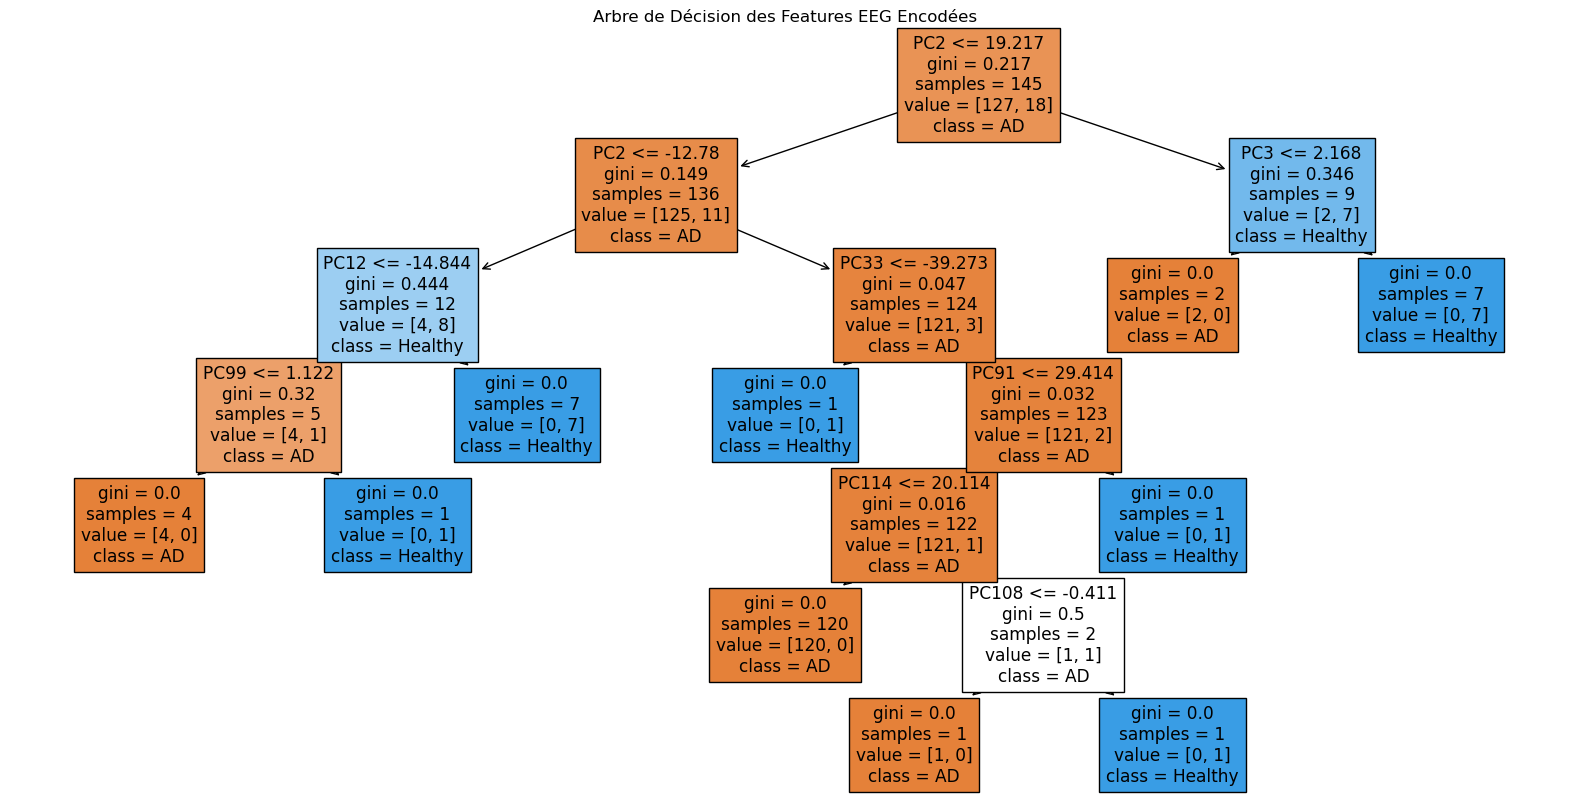

In [13]:
# Visualiser l'arbre de décision
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=np.unique(y), filled=True)
plt.title('Arbre de Décision des Features EEG Encodées')
plt.show()


In [14]:
# Séparer les features et la cible
X = data.drop(columns=['Condition'])  # Features
y = data['Condition']  # Target labels

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print(f'Taille des données d\'entraînement: {X_train.shape}')
print(f'Taille des données de test: {X_test.shape}')


Taille des données d'entraînement: (145, 128)
Taille des données de test: (37, 128)


In [15]:
# Créer le classificateur Random Forest
rf_clf = RandomForestClassifier(random_state=3)

# Entraîner le modèle
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=3)

In [16]:
# Prédire les labels pour l'ensemble de test
y_pred = rf_clf.predict(X_test)


In [17]:
# Calculer l'accuracy
accuracy = accuracy_score(y_test, y_pred)

# Afficher l'accuracy
print(f'Accuracy du modèle Random Forest: {accuracy:.2f}')

Accuracy du modèle Random Forest: 0.86


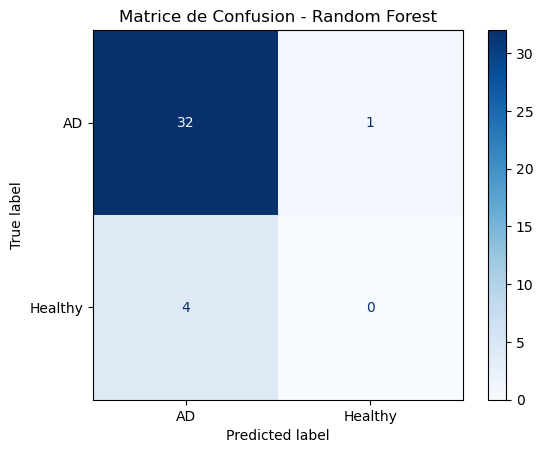

In [18]:
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion - Random Forest')
plt.show()


In [19]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [20]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score

# Calculate and display the accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of SVM model: {accuracy_svm:.2f}')


Accuracy of SVM model: 0.86


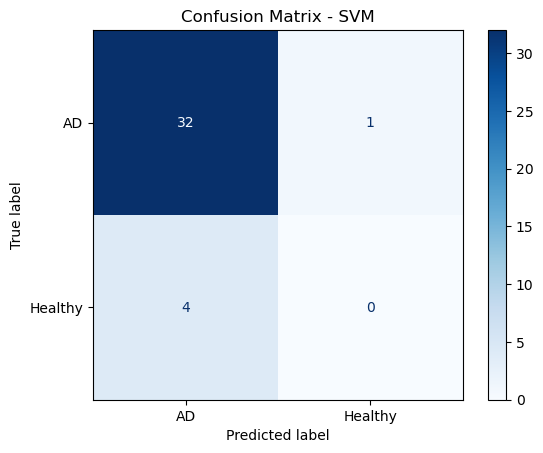

In [22]:
import numpy as np

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=np.unique(y_test))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=np.unique(y_test))
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SVM')
plt.show()


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [24]:
# Predict on the test set
y_pred_knn = knn_model.predict(X_test)


In [25]:
# Calculate and display the accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy of KNN model: {accuracy_knn:.2f}')


Accuracy of KNN model: 0.89


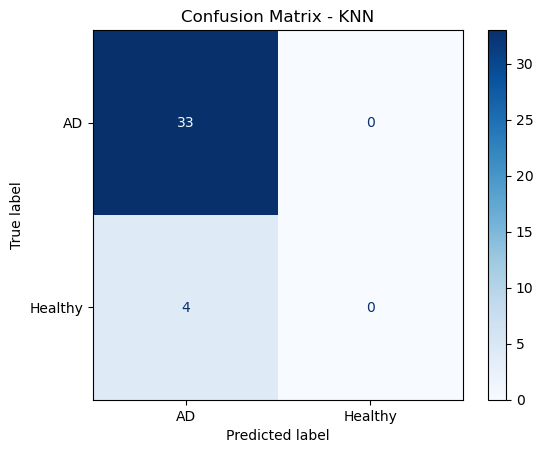

In [26]:
import numpy as np
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=np.unique(y_test))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=np.unique(y_test))
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - KNN')
plt.show()
